In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import dates

In [4]:
df = pd.read_csv("t00.csv",index_col=0,parse_dates=True)

In [32]:
sub_df1 = df[df["minchange"] < 0]
sub_df2 = df[~(df["minchange"] < 0)]
sub_df1["wave_result"] = 1.0/sub_df1["wave_result"]
df = pd.concat([sub_df1,sub_df2])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [33]:
df.tail(3)

,change,price,volume,volume_mean,volume_ratio,volume_ratio3,volume_ratio5,minchange,minchange3,minchange5,momentum,momentum3,momentum5,wave_change,wave_volume_ratio,wave_result,min_result3,min_result5,momentum_wave
date,,,,,,,,,,,,,,,,,,,
2016-12-30 14:57:00,1.000528,6473.794,569100.0,464070.0,1.226324,1.196813,1.219388,0.000005,0.000280,-0.000037,0.000006,0.000335,-0.000045,1.00028,1.196813,1.0,NaN,NaN,1.197148
2016-12-30 14:58:00,1.000528,6473.794,0.0,0.0,NaN,1.211054,1.197964,0.000000,0.000141,0.000016,NaN,0.000170,0.000019,1.00000,NaN,NaN,NaN,NaN,NaN
2016-12-30 14:59:00,1.000528,6473.794,0.0,0.0,NaN,1.226324,1.196813,0.000000,0.000005,0.000280,NaN,0.000006,0.000335,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
def plot(data_df,x,y,ax):
#     win_ratio_se = pd.Series()
    mean_se = pd.Series()
    for i in range(0,20):
        low = data_df[x].quantile(float(i)/20.0)
        upper = data_df[x].quantile(float(i)/20.0 + 1.0/20.0)
        sub_df = data_df[(data_df[x] < upper) & (data_df[x] > low)]
        if len(sub_df) == 0:
            continue
#         win_ratio,count,mean = result(valid_df)
#         print (upper + low)/2,count,mean
#         win_ratio_se[(upper + low)/2] = win_ratio
        mean_se[(upper + low)/2] = sub_df[y].mean()
    fig, ax = plt.subplots(figsize=(14,8))
#     ax2 = ax.twinx()
    # ax.scatter(x=data_df["index_minchange"],y=data_df["change"],alpha=0.3,s=3)
    mean_se.plot(ax=ax)
#     win_ratio_se.plot(ax = ax2,c="r")

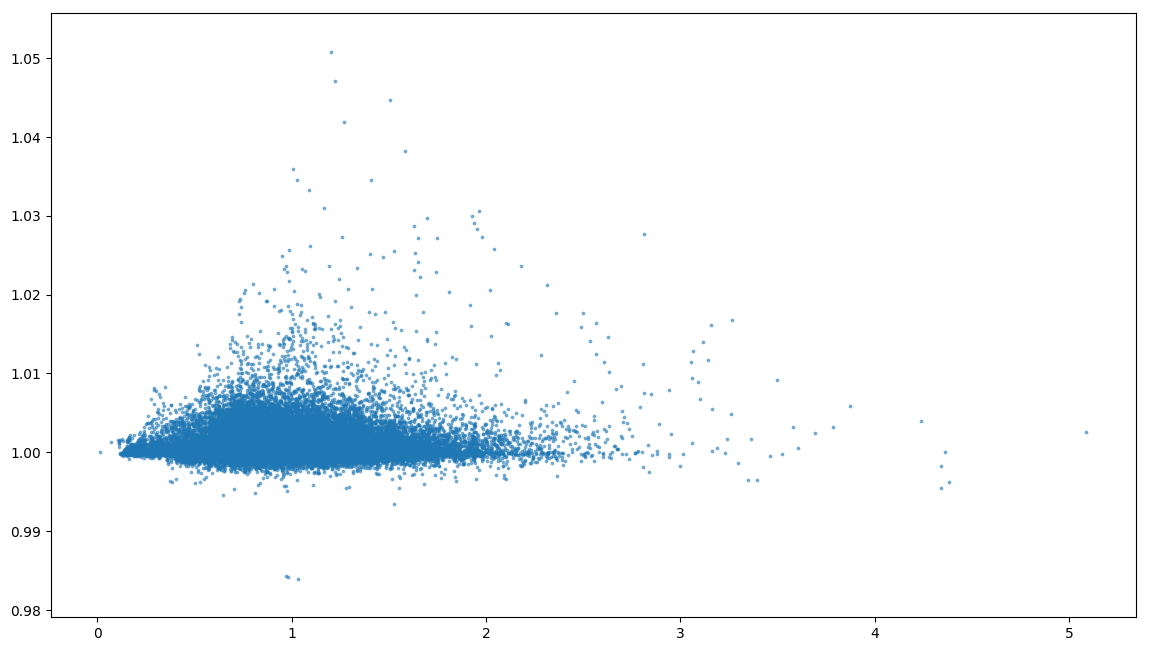

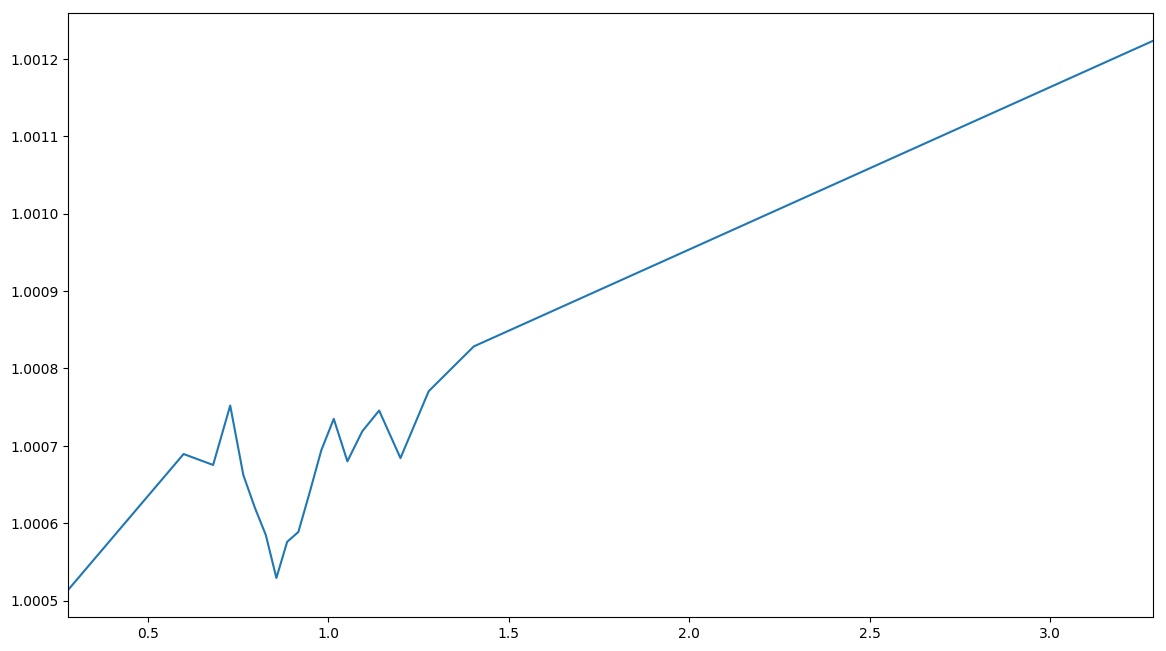

In [39]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=df.wave_volume_ratio,y=df.wave_result,alpha=0.5,s=3)
plot(df,"wave_volume_ratio","wave_result",ax)

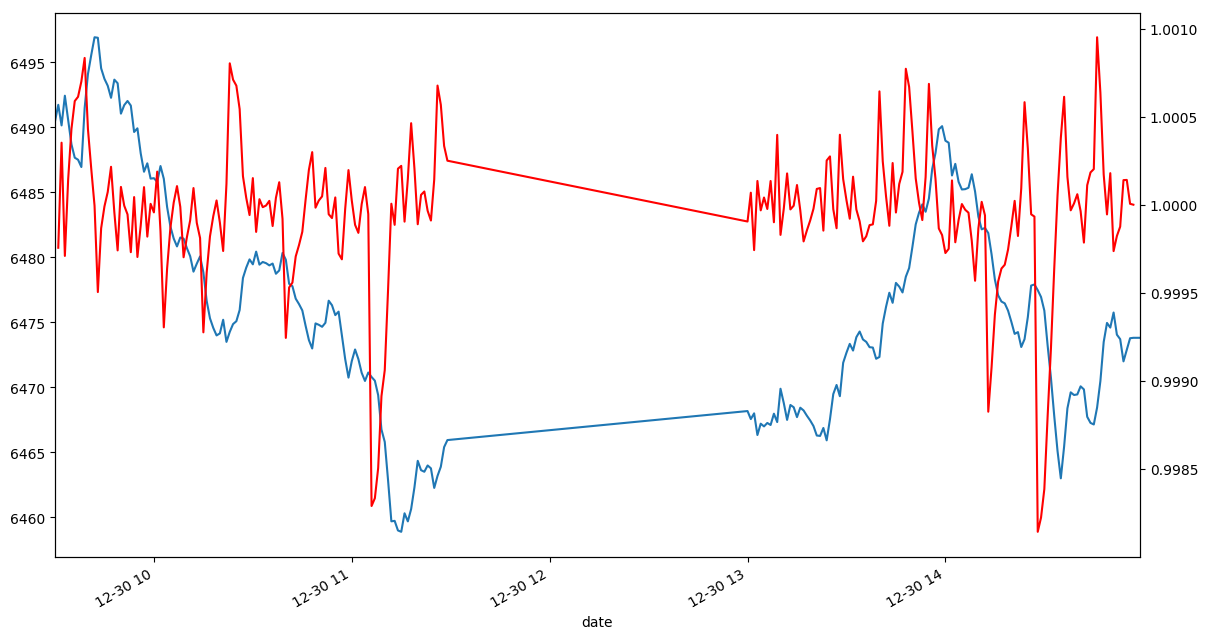

In [31]:
fig, ax = plt.subplots(figsize=(14,8))
ax2 = ax.twinx()
sub_df["price"].plot(figsize=(14,8),ax=ax)
sub_df["wave_result"].plot(figsize=(14,8),ax=ax2,c='r')

# momentum

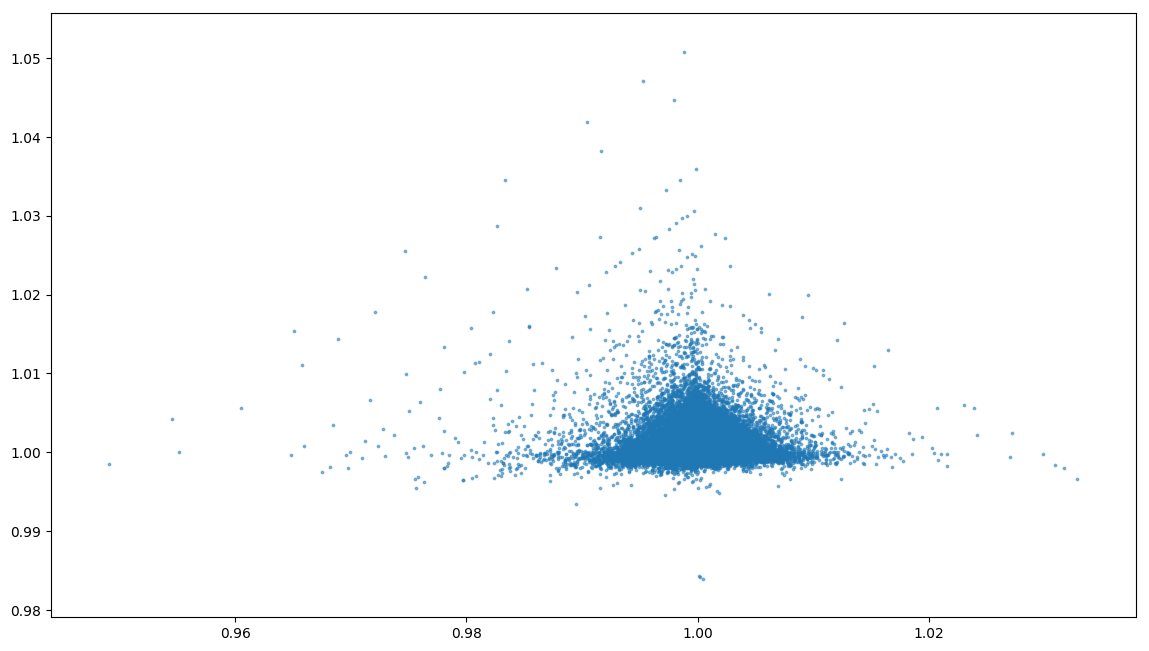

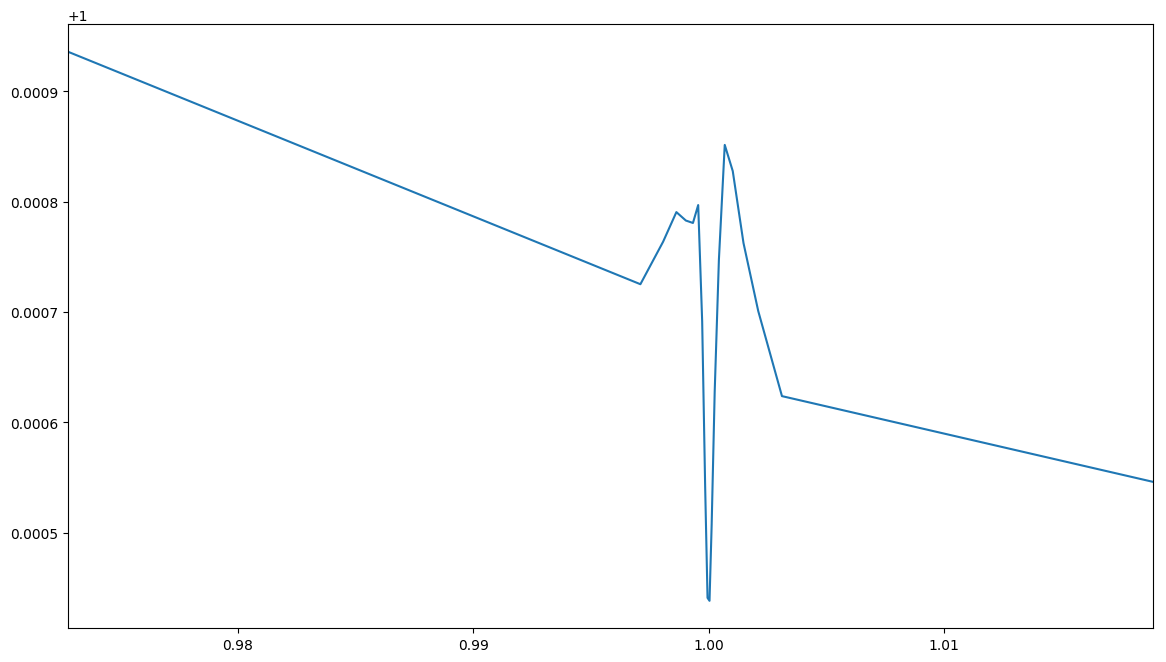

In [40]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=df.wave_change,y=df.wave_result,alpha=0.5,s=3)
plot(df,"wave_change","wave_result",ax)

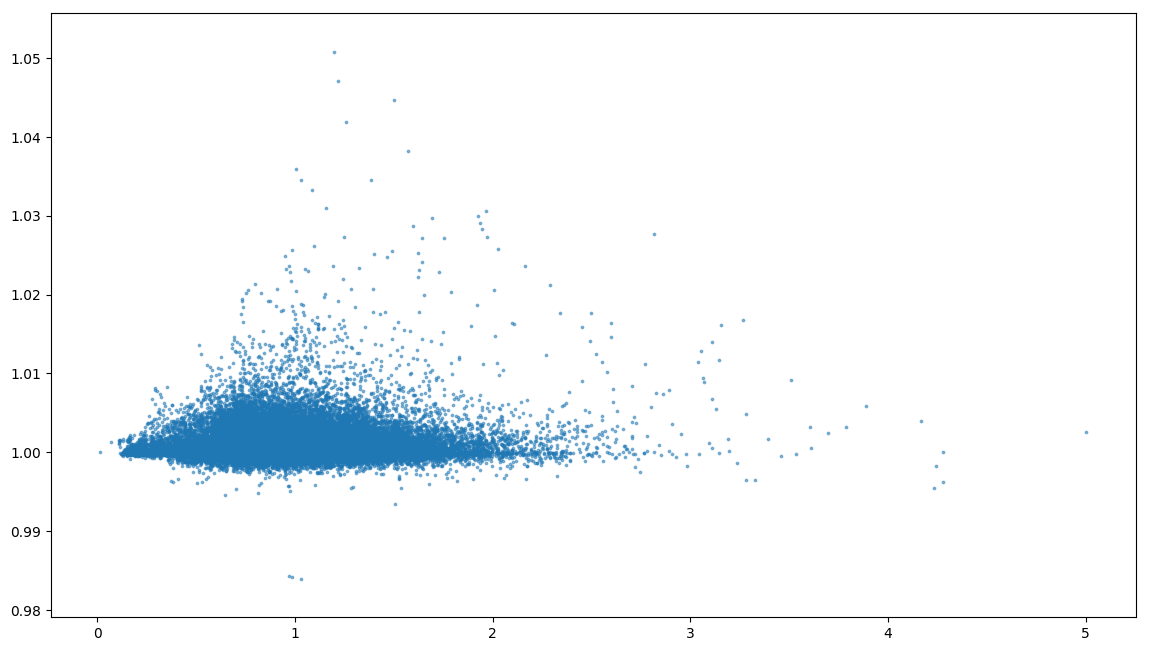

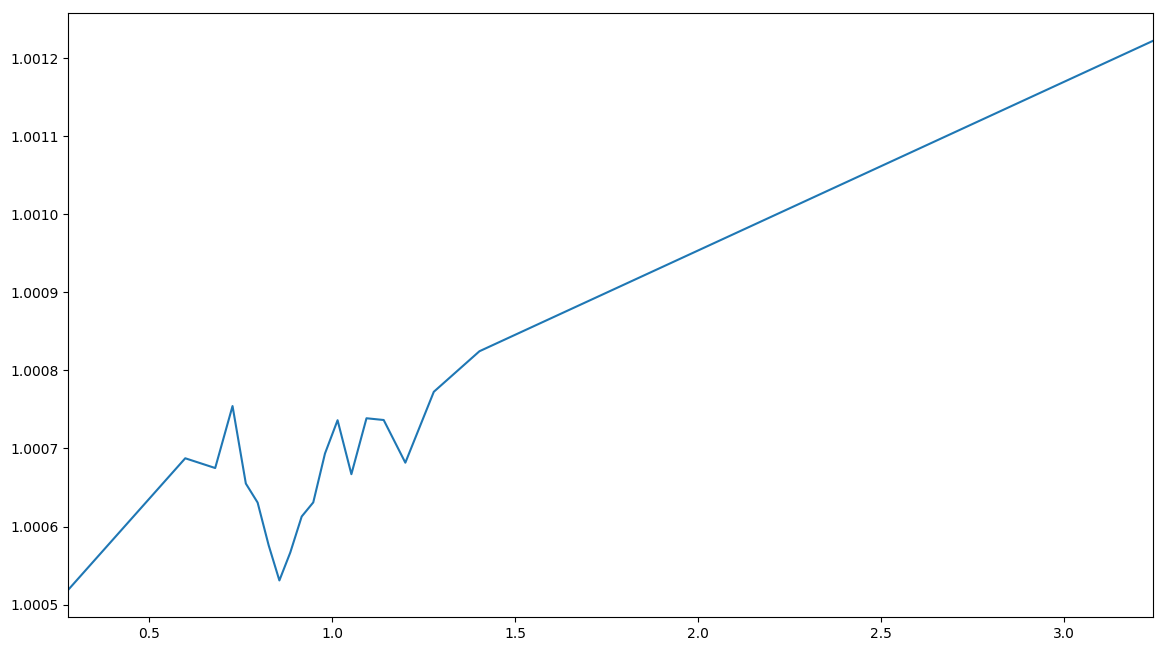

In [41]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=df.momentum_wave,y=df.wave_result,alpha=0.5,s=3)
plot(df,"momentum_wave","wave_result",ax)

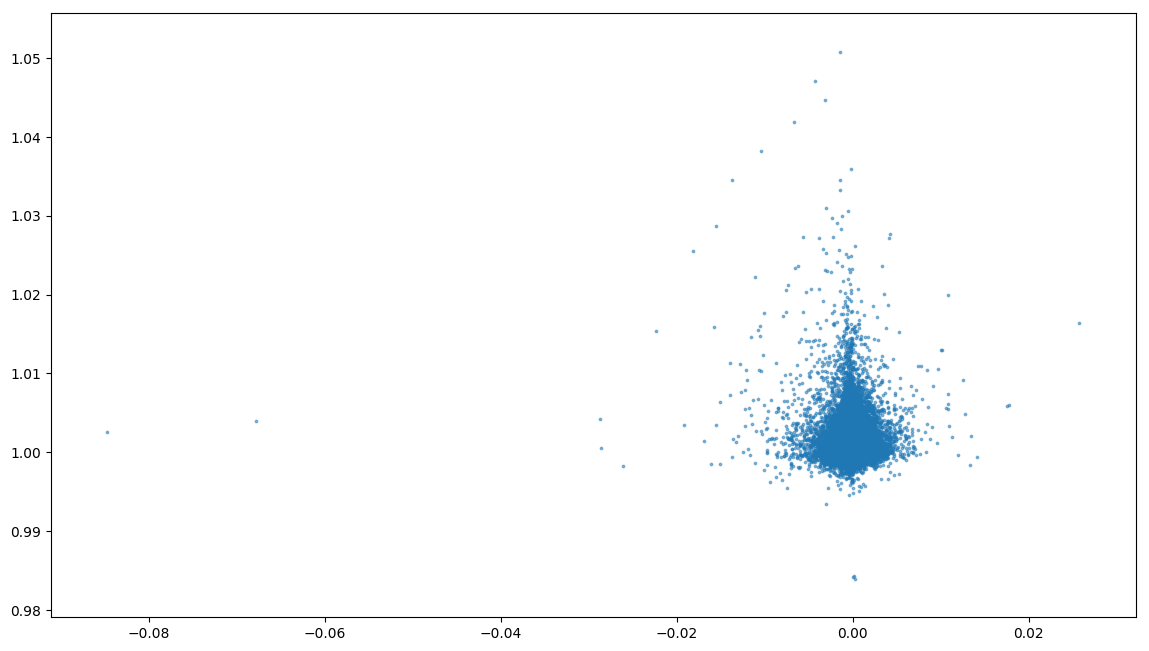

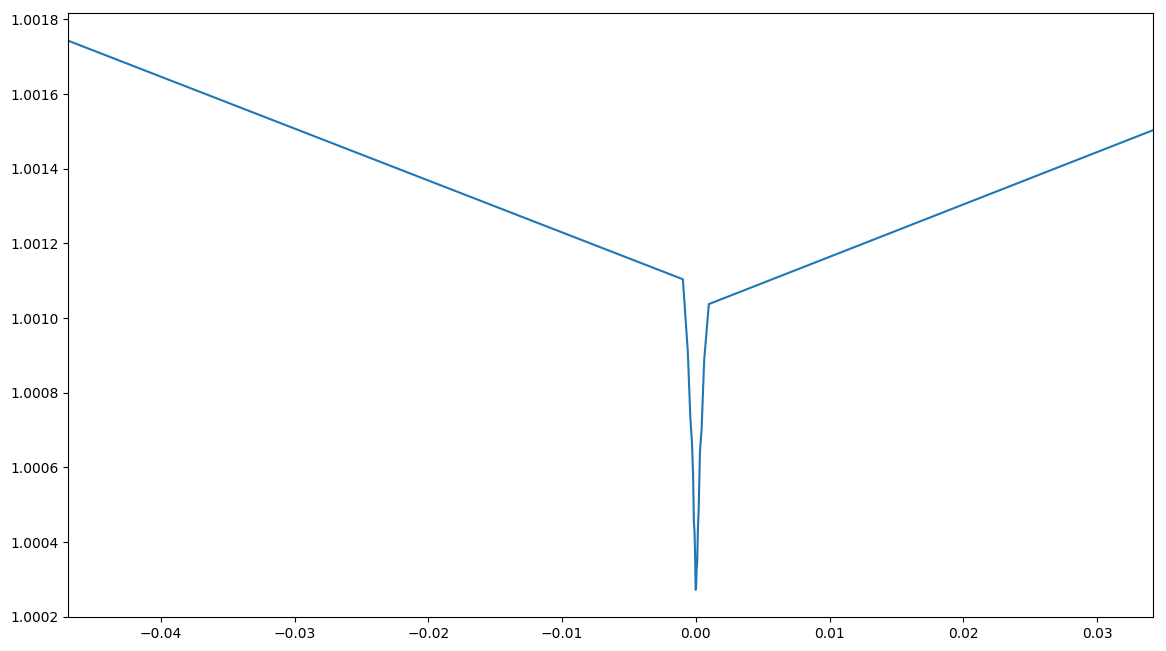

In [42]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=df.momentum,y=df.wave_result,alpha=0.5,s=3)
plot(df,"momentum","wave_result",ax)

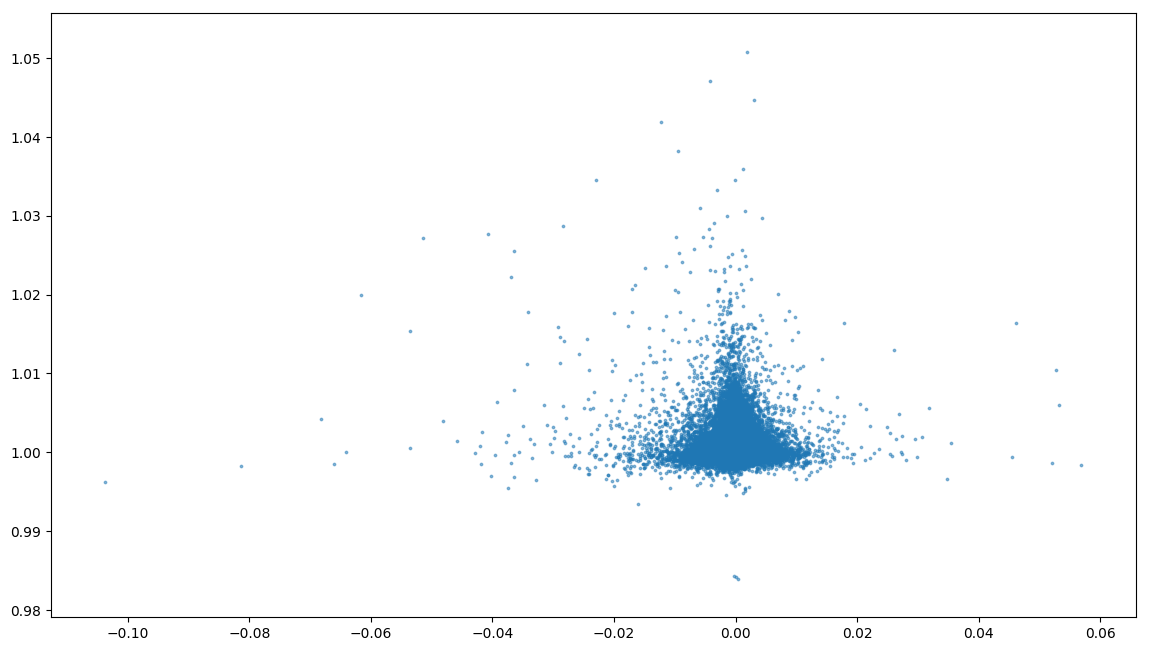

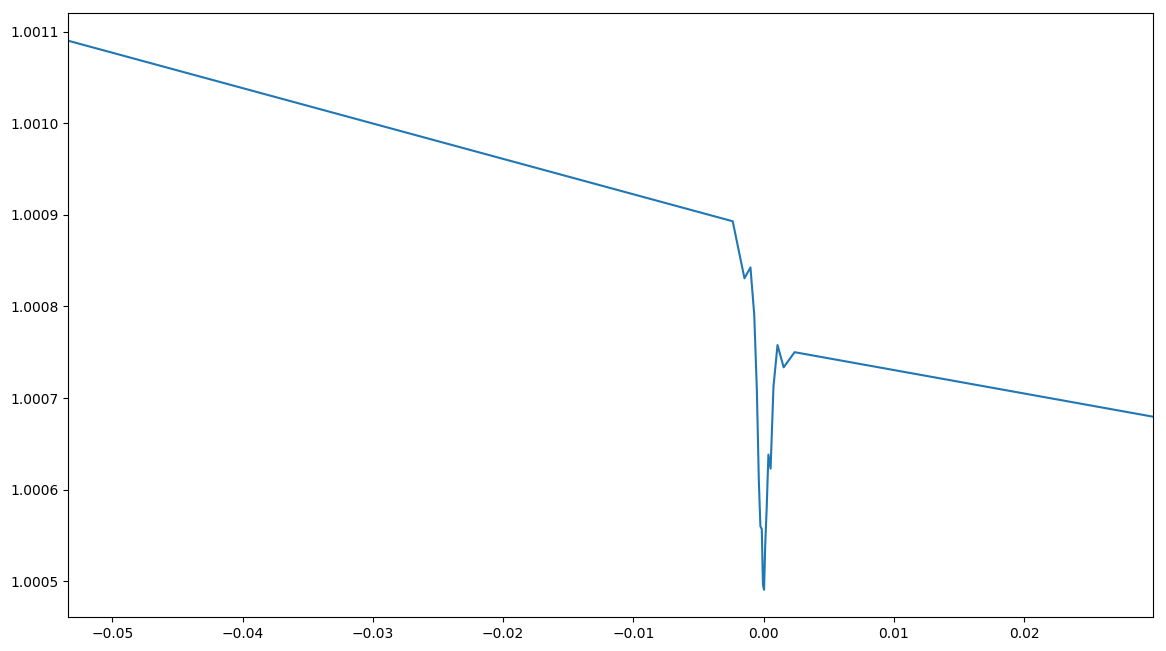

In [43]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=df.momentum3,y=df.wave_result,alpha=0.5,s=3)
plot(df,"momentum3","wave_result",ax)

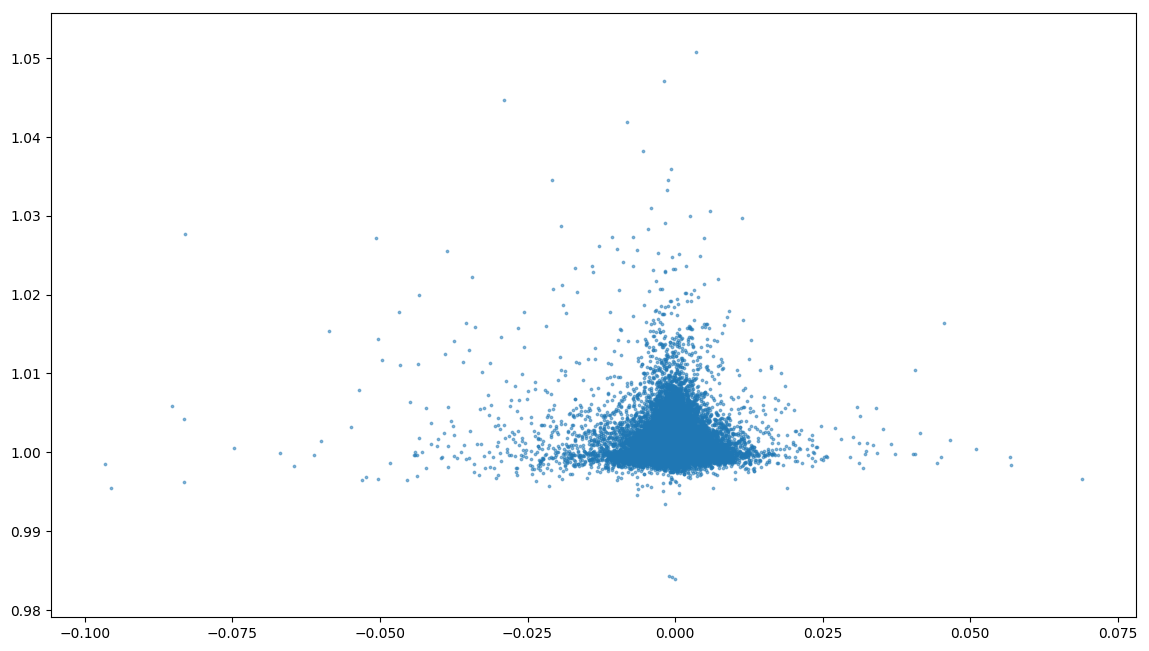

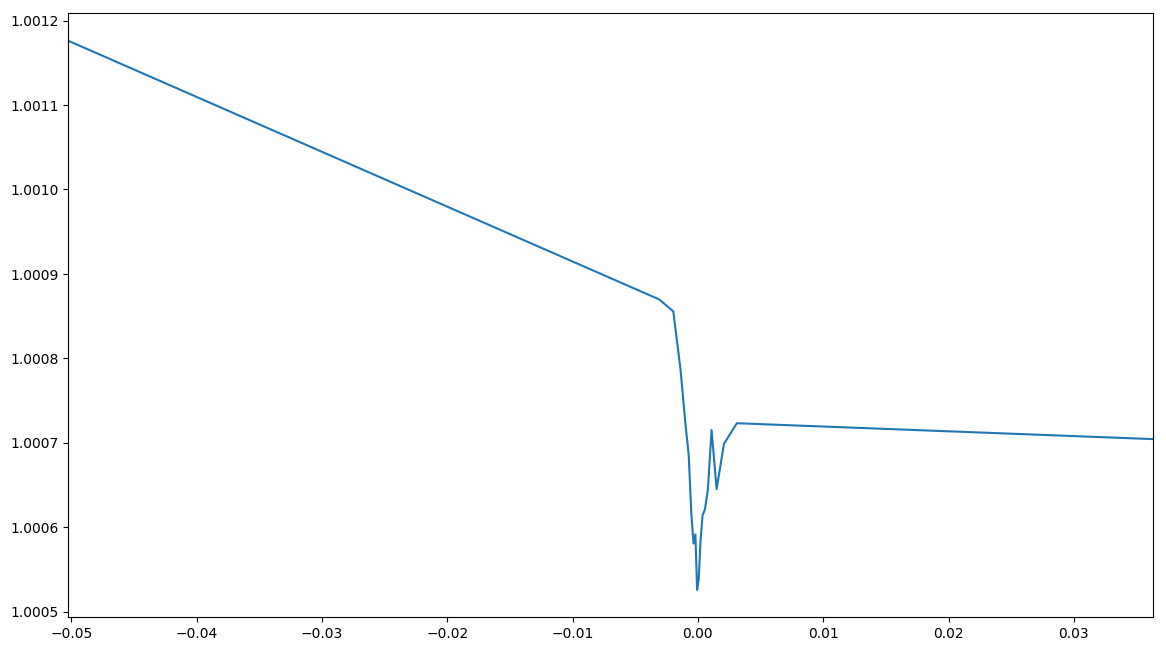

In [44]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=df.momentum5,y=df.wave_result,alpha=0.5,s=3)
plot(df,"momentum5","wave_result",ax)